### Домашнее задание к лекции «Базовые понятия статистики»

#### Задание 1. Загрузка данных
Изучить представленный набор данных на основе описания его столбцов, загрузить его и оставить 8 столбцов для дальнейшего изучения: 

surgery?, 
 Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_main = pd.read_csv('C:\\Users\\Ryzen\\Desktop\\DataSet\\Data Analyst\\12_Python_statistics_base_concept\\исходники\\horse_data.csv', header = None, sep = ",")
df_main.head()


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


In [3]:
# Присвоить столбцам названия:
# surgery? - 0, Age - 1, rectal temperature - 3, pulse - 4, 
# respiratory rate - 5, temperature of extremities - 6, pain - 10, 
# outcome - 22
df_main = pd.read_csv(
    'C:\\Users\\Ryzen\\Desktop\\DataSet\\Data Analyst\\12_Python_statistics_base_concept\\исходники\\horse_data.csv', 
    header = None, sep = ",", thousands=',', usecols=[0,1,3,4,5,6,10,22], 
    names=[
        'surgery?', 'Age', 'rectal temperature',
        'pulse', 'respiratory rate', 'temperature of extremities',
        'pain', 'outcome'
    ])
df_main

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2,1,38.50,66,28,3,5,2
1,1,1,39.2,88,20,?,3,3
2,2,1,38.30,40,24,1,3,1
3,1,9,39.10,164,84,4,2,2
4,2,1,37.30,104,35,?,?,2
...,...,...,...,...,...,...,...,...
295,1,1,?,120,70,4,2,3
296,2,1,37.20,72,24,3,4,3
297,1,1,37.50,72,30,4,4,2
298,1,1,36.50,100,24,3,3,1


#### Задание 2. Первичное изучение данных
Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

In [4]:
# определить тип данных в столбцах
df_main.dtypes

surgery?                      object
Age                            int64
rectal temperature            object
pulse                         object
respiratory rate              object
temperature of extremities    object
pain                          object
outcome                       object
dtype: object

In [5]:
# Замена символа "?"
df_main = df_main.replace("?", "NaN")
df_main

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2,1,38.50,66,28,3,5,2
1,1,1,39.2,88,20,NaN,3,3
2,2,1,38.30,40,24,1,3,1
3,1,9,39.10,164,84,4,2,2
4,2,1,37.30,104,35,NaN,NaN,2
...,...,...,...,...,...,...,...,...
295,1,1,NaN,120,70,4,2,3
296,2,1,37.20,72,24,3,4,3
297,1,1,37.50,72,30,4,4,2
298,1,1,36.50,100,24,3,3,1


In [6]:
# перевод данных в числа с плавающей точкой
df_main = df_main.astype(float)
df_main

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1.0,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1.0,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1.0,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9.0,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1.0,37.3,104.0,35.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1.0,NaN,120.0,70.0,4.0,2.0,3.0
296,2.0,1.0,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1.0,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1.0,36.5,100.0,24.0,3.0,3.0,1.0


In [7]:
# проверка типа данных
df_main.dtypes

surgery?                      float64
Age                           float64
rectal temperature            float64
pulse                         float64
respiratory rate              float64
temperature of extremities    float64
pain                          float64
outcome                       float64
dtype: object

In [8]:
# вывод значений датафрейма с двумя знаками после запятой
round(df_main.describe(), 2)

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,299.00,300.00,240.00,276.00,242.00,244.00,245.00,299.00
mean,1.40,1.64,38.17,71.91,30.42,2.35,2.95,1.55
std,0.49,2.17,0.73,28.63,17.64,1.05,1.31,0.74
min,1.00,1.00,35.40,30.00,8.00,1.00,1.00,1.00
25%,1.00,1.00,37.80,48.00,18.50,1.00,2.00,1.00
50%,1.00,1.00,38.20,64.00,24.50,3.00,3.00,1.00
75%,2.00,1.00,38.50,88.00,36.00,3.00,4.00,2.00
max,2.00,9.00,40.80,184.00,96.00,4.00,5.00,3.00


In [9]:
# определение выбросов
Q1 = df_main.quantile(0.25)
Q3 = df_main.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR) 
upper_bound = Q3 + (1.5 * IQR)

In [10]:
# суммирование количества выбрасов в столбцах
((df_main < lower_bound) | (df_main > upper_bound)).sum()

surgery?                       0
Age                           24
rectal temperature            14
pulse                          5
respiratory rate              17
temperature of extremities     0
pain                           0
outcome                        0
dtype: int64

In [11]:
# вывод датафрейма, True указывает на местонахождение выброса
((df_main < lower_bound) | (df_main > upper_bound)).head()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,True,False,True,True,False,False,False
4,False,False,False,False,False,False,False,False


#### Задание 3. Работа с пропусками
Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

In [12]:
# Расчет количества пропусков:
df_main.isnull().sum()

surgery?                       1
Age                            0
rectal temperature            60
pulse                         24
respiratory rate              58
temperature of extremities    56
pain                          55
outcome                        1
dtype: int64

In [13]:
# список долей пропусков в каждом из столбцов (%)
(df_main.isna().mean() * 100).round(2)

surgery?                       0.33
Age                            0.00
rectal temperature            20.00
pulse                          8.00
respiratory rate              19.33
temperature of extremities    18.67
pain                          18.33
outcome                        0.33
dtype: float64

In [14]:
# # Метод А - удаления всех пропусков: 
# df_main.dropna().info()
# # Выводы: теряем около 50% данных.
# # Необходимо сделасть проверку метода по базовым статистикам
# # Гипотеза: Если расхождение значений статистик до 10% - Метод возможен для применения

In [15]:
# # Рассмотрим метод А - удаления всех пропусков:
# print(round(df_main.describe(), 2))
# print('---------------------------')
# print(round(df_main.dropna().describe(), 2))

# # Вывод: В случае удаления всех пропусков базовые статистики меняются в допустимых пределах
# # Максимальное отклонение: 
# # mean (temperature of extremities): (2,22/2,35-1)*100% = 6%
# # std (pain): (1,22/1,31-1)*100% = 7%
# # Расхождение выборочных значений статистик меньше 10%. Метод возможен для использования

In [16]:
# # Метод А: Сформировать датафрейм, в котором пропуски будут отсутствовать:
# df_main.dropna().head(10)

In [17]:
# # Рассмотрим метод Б - удаления строк, в которых как минимум 7/8 значений заполнено 
# df_main.dropna(thresh=7).info()

# #Выводы: теряем от 23% до 30% данных.
# # Необходимо сделасть проверку метода по базовым статистикам
# # Гипотеза: Если расхождение значений статистик до 10% - Метод возможен для применения


In [18]:
# # Рассмотрим метод Б - удаления строк, в которых как минимум 7/8 значений заполнено:
# print(round(df_main.describe(), 2))
# print('---------------------------')
# print(round(df_main.dropna(thresh=7).describe(), 2))

# # Вывод: В случае удаления всех пропусков базовые статистики меняются в допустимых пределах
# # Максимальное отклонение: 
# # mean (temperature of extremities): (2,29/2,35-1)*100% = 3%
# # std (pain): (1,26/1,31-1)*100% = 4%
# # Расхождение выборочных значений статистик меньше 10%. 
# # Метод Б лучше метода А на 50%
# # Метод Б возможен для использования

In [19]:
# # Метод Б: Сформировать датафрейм, в котором пропуски будут отсутствовать:
# df_main.dropna(thresh=7).head(10)

### Доработка согласно рекомендаций преподавателя:

In [20]:
# Заполнить пропуски в таблице:
# 1. Определить способ восстановления пропусков
# 2. Выдвинуть гипотезы о взаимосвязи полей с пропущенными значениями 

#### Явные выбросы в [Age]. 
Делаем замену на медианное значение. Графическая проверка по гистограмме

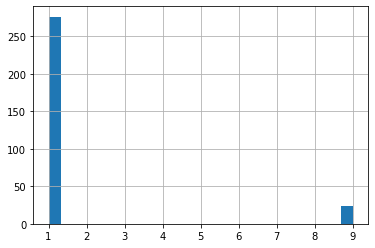

In [21]:
# Графический способ проверки выбросов в Age:
df_main['Age'].hist(bins=25)

In [22]:
# Определяем выбросы (явные ошибки) записи данных в 'Age'
# Вывод датафрейма без выбросов
q1 = df_main['Age'].quantile(0.25)
q3 = df_main['Age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df_main[df_main['Age'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers.head(10)

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1.0,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1.0,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1.0,38.3,40.0,24.0,1.0,3.0,1.0
4,2.0,1.0,37.3,104.0,35.0,NaN,NaN,2.0
5,2.0,1.0,NaN,NaN,NaN,2.0,2.0,1.0
6,1.0,1.0,37.9,48.0,16.0,1.0,3.0,1.0
7,1.0,1.0,NaN,60.0,NaN,3.0,NaN,2.0
8,2.0,1.0,NaN,80.0,36.0,3.0,4.0,3.0
10,1.0,1.0,38.1,66.0,12.0,3.0,3.0,1.0
11,2.0,1.0,39.1,72.0,52.0,2.0,2.0,1.0


In [23]:
# вывод выбросов
pd.concat([df_main, remove_outliers]).drop_duplicates(keep=False)

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,1.0,9.0,39.1,164.0,84.0,4.0,2.0,2.0
9,2.0,9.0,38.3,90.0,NaN,1.0,5.0,1.0
13,2.0,9.0,38.0,92.0,28.0,1.0,1.0,2.0
16,1.0,9.0,NaN,128.0,36.0,3.0,4.0,2.0
23,1.0,9.0,38.3,130.0,60.0,NaN,2.0,1.0
39,1.0,9.0,39.2,146.0,96.0,NaN,NaN,2.0
41,2.0,9.0,39.0,150.0,72.0,NaN,NaN,1.0
55,1.0,9.0,38.6,160.0,20.0,3.0,3.0,2.0
74,1.0,9.0,NaN,NaN,NaN,NaN,NaN,2.0
75,1.0,9.0,39.7,100.0,NaN,3.0,2.0,3.0


In [24]:
# Замена выбросов в [Age] на медианное значение
# Ограничение "2", согласно условию датасета для [Age]: 1 = Adult horse; 2 = Young (< 6 months)
median = df_main.loc[df_main['Age']<2, 'Age'].median() 
df_main.loc[df_main.Age > 2, 'Age'] = np.nan 
df_main['Age'].fillna(median,inplace=True)
df_main['Age'] = df_main['Age'].mask(df_main['Age'] >2, median)
df_main

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1.0,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1.0,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1.0,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,1.0,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1.0,37.3,104.0,35.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1.0,NaN,120.0,70.0,4.0,2.0,3.0
296,2.0,1.0,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1.0,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1.0,36.5,100.0,24.0,3.0,3.0,1.0


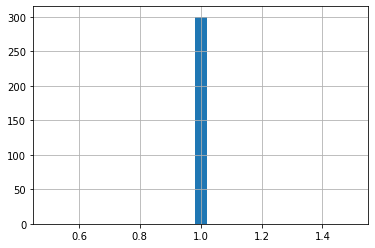

In [25]:
# Проверка графическим способом приведения выбросов в [Age] к медианным значениям:
df_main['Age'].hist(bins=25)

In [26]:
### Теперь проработка пропусков 

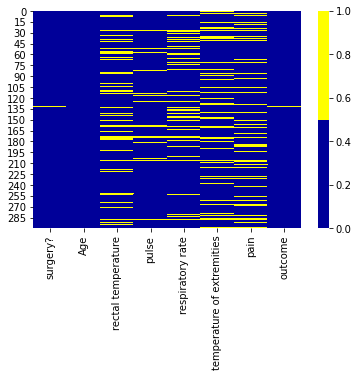

In [27]:
# Тепловая карта пропущенных значений
# Желтый - пропуски, синий - нет пропусков данных
colours = ['#000099', '#ffff00'] 
sns.heatmap(df_main.isnull(), cmap=sns.color_palette(colours))

In [28]:
df_numeric = df_main.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
df_numeric

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1.0,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1.0,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1.0,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,1.0,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1.0,37.3,104.0,35.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1.0,NaN,120.0,70.0,4.0,2.0,3.0
296,2.0,1.0,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1.0,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1.0,36.5,100.0,24.0,3.0,3.0,1.0


In [29]:
# Цикл: замена NaN на медианное значение 
for col in numeric_cols:
    missing = df_main[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:
        med = df_main[col].median()
        df_main[col] = df_main[col].fillna(med)

In [30]:
# визуальная проверка замен в df_main
df_main

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1.0,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1.0,39.2,88.0,20.0,3.0,3.0,3.0
2,2.0,1.0,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,1.0,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1.0,37.3,104.0,35.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1.0,38.2,120.0,70.0,4.0,2.0,3.0
296,2.0,1.0,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1.0,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1.0,36.5,100.0,24.0,3.0,3.0,1.0


In [31]:
# проверка базовых статистик df_main
df_main.describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,300.000000,300.0,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.396667,1.0,38.174333,71.280000,29.273333,2.470000,2.960000,1.550000
std,0.490023,0.0,0.654831,27.541545,16.010979,0.975845,1.181689,0.736642
min,1.000000,1.0,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000
25%,1.000000,1.0,37.900000,48.000000,20.000000,1.000000,2.000000,1.000000
50%,1.000000,1.0,38.200000,64.000000,24.500000,3.000000,3.000000,1.000000
75%,2.000000,1.0,38.500000,88.000000,34.250000,3.000000,4.000000,2.000000
max,2.000000,1.0,40.800000,184.000000,96.000000,4.000000,5.000000,3.000000


In [32]:
# проверка выравнивания df_main по количеству значений в каждом столбце
# проверка отсутствия Non-Null в df_main
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    300 non-null    float64
 1   Age                         300 non-null    float64
 2   rectal temperature          300 non-null    float64
 3   pulse                       300 non-null    float64
 4   respiratory rate            300 non-null    float64
 5   temperature of extremities  300 non-null    float64
 6   pain                        300 non-null    float64
 7   outcome                     300 non-null    float64
dtypes: float64(8)
memory usage: 18.9 KB


#### ГИПОТЕЗА зависимости значений:
Пульс (pulse) зависит от частоты дыхания (respiratory rate). Чем выше respiratory rate, тем выше pulse